Project - Data Preprocessing and EDA 

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
# Load the data

df = pd.read_csv("C:\\Sem 4\\ML\\Project\\bank_full.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [40]:
# Check if categorical columns have nulls
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    if df[x].isnull().any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

# Check if numerical columns have nulls
categorical = df.select_dtypes(include='int64').columns

for x in categorical:
    if df[x].isnull().any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

No Nulls in job
No Nulls in marital
No Nulls in education
No Nulls in default
No Nulls in housing
No Nulls in loan
No Nulls in contact
No Nulls in month
No Nulls in poutcome
No Nulls in y
No Nulls in age
No Nulls in balance
No Nulls in day
No Nulls in duration
No Nulls in campaign
No Nulls in pdays
No Nulls in previous


In [41]:
# Print the unique values in the categorical columns to check if bad data exists
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    print(f"{x}: {df[x].unique()}")

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [5]:
# Check stats for numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


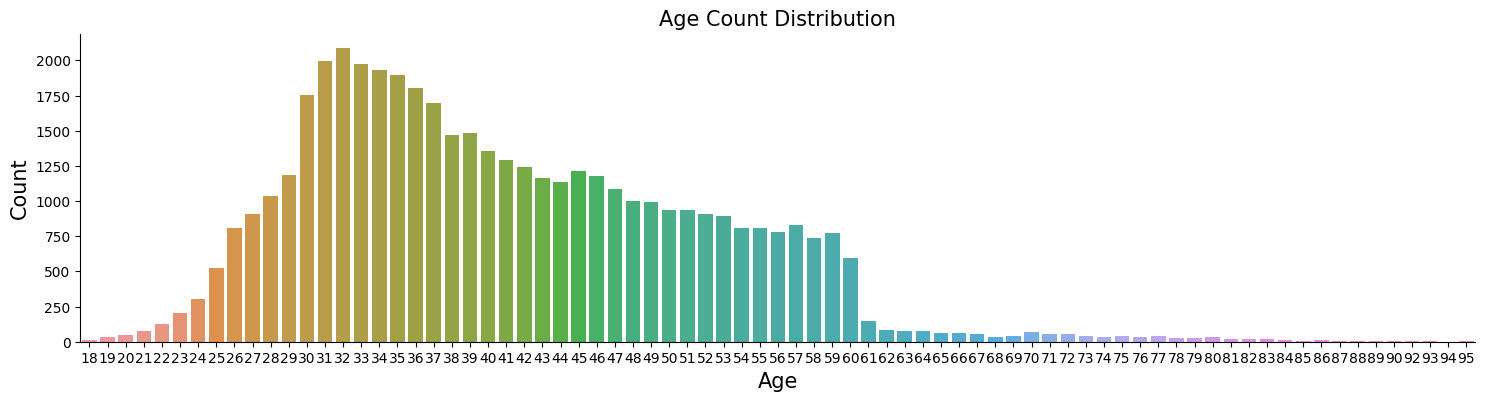

In [22]:
# Basic EDA - Age
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()


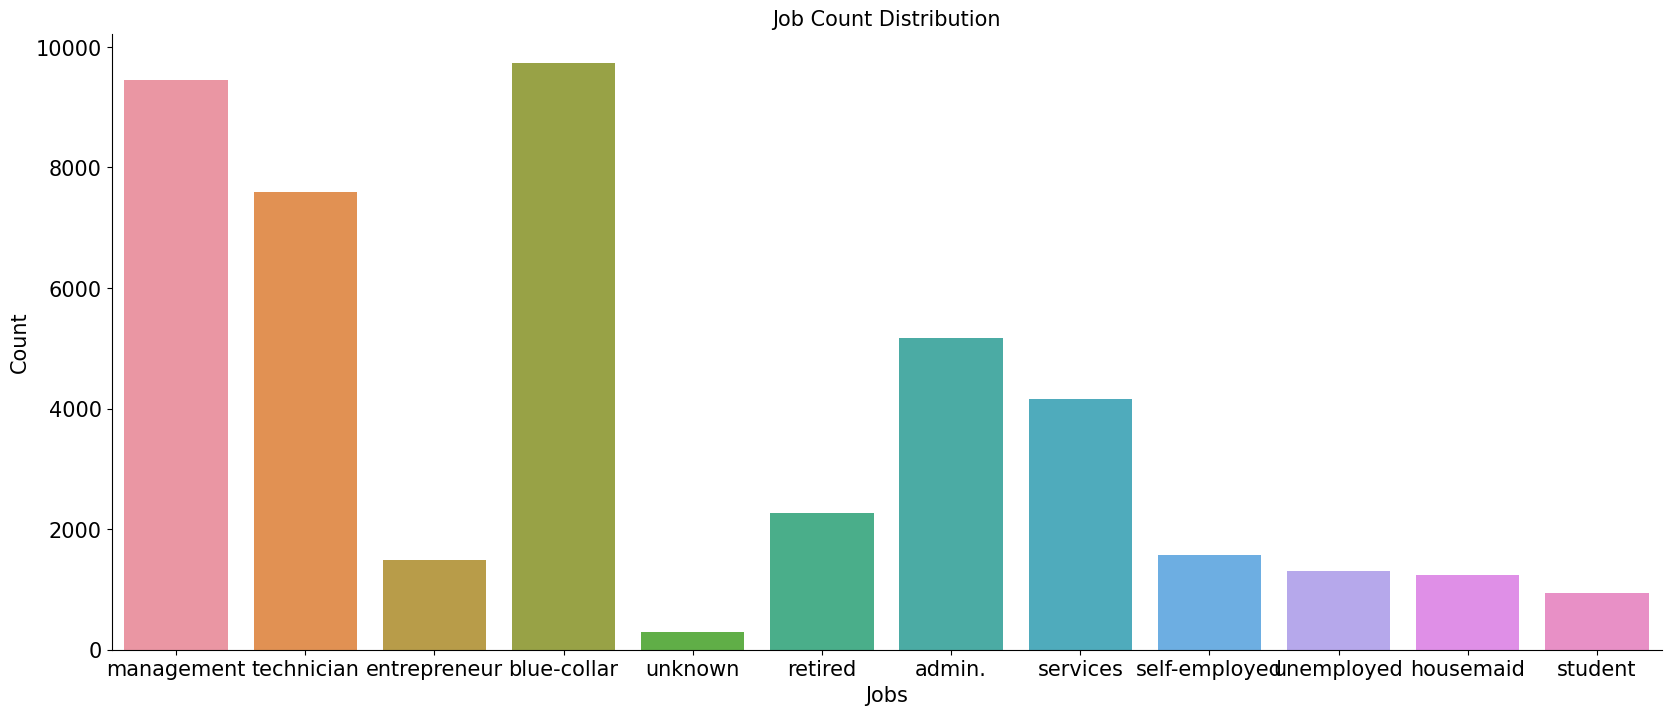

In [27]:
# EDA - Jobs
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Jobs', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

c:\Users\srini\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\srini\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


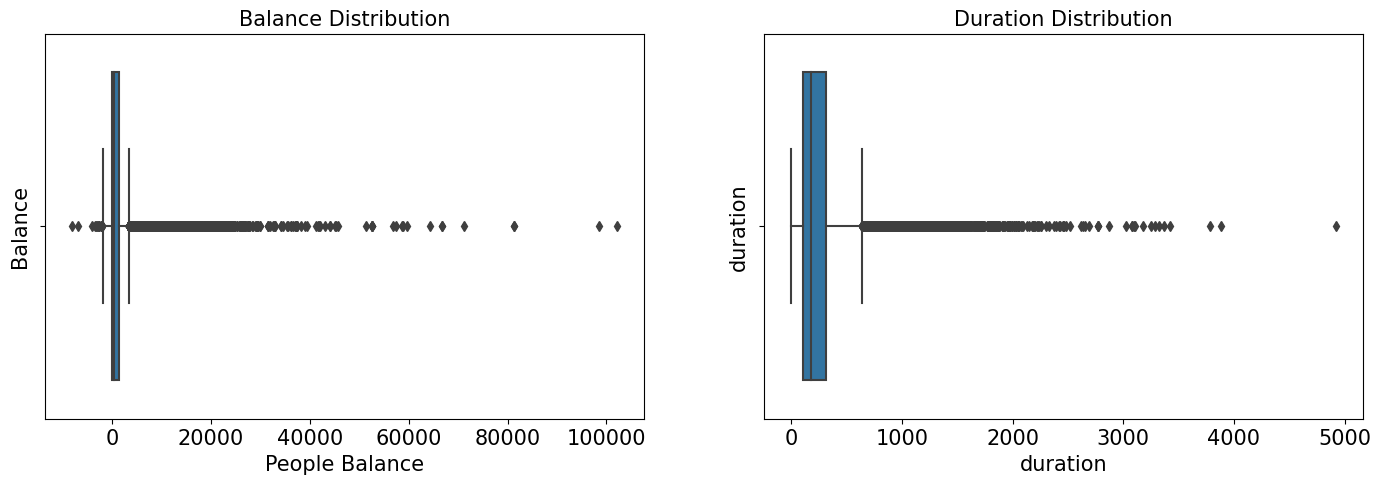

In [6]:
# Balance and duration standard deviation is large, check

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (17, 5))
sns.boxplot(x = 'balance', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Balance', fontsize=15)
ax1.set_ylabel('Balance', fontsize=15)
ax1.set_title('Balance Distribution', fontsize=15)
ax1.tick_params(labelsize=15)


sns.boxplot(x = 'duration', data = df, orient = 'v', ax = ax2)
ax2.set_xlabel('duration', fontsize=15)
ax2.set_ylabel('duration', fontsize=15)
ax2.set_title('Duration Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

In [7]:
# Check values of balance and duration 
# Calculate the minimum, Q1 (25th percentile), median (Q2 or 50th percentile), Q3 (75th percentile), and maximum
min_balance = df['balance'].min()
q1_balance = df['balance'].quantile(0.25)
median_balance = df['balance'].median()
q3_balance = df['balance'].quantile(0.75)
max_balance = df['balance'].max()
iqr_balance = q3_balance - q1_balance
min_whisker = q1_balance - 1.5 * iqr_balance 
max_whisker = q3_balance + 1.5 * iqr_balance 


# Print the calculated statistics
print(f"Q1 (25th percentile): {q1_balance}")
print(f"Q3 (75th percentile): {q3_balance}")
print(f"IQR (Interquartile Range): {iqr_balance}")
print(f"Minimum value (whisker): {min_whisker}")
print(f"Maximum value (whisker): {max_whisker}")
print(f"Actual minimum value: {min_balance}")
print(f"Actual maximum value: {max_balance}")

count_above_max_whisker = len(df[df['balance'] > max_whisker])
count_below_min_whisker = len(df[df['balance'] < min_whisker])
print(f"\nBalance Outliers greater than the maximum whisker: {count_above_max_whisker}")
print(f"Balance Outliers lesser than the minimum whisker: {count_below_min_whisker}")

Q1 (25th percentile): 72.0
Q3 (75th percentile): 1428.0
IQR (Interquartile Range): 1356.0
Minimum value (whisker): -1962.0
Maximum value (whisker): 3462.0
Actual minimum value: -8019
Actual maximum value: 102127

Balance Outliers greater than the maximum whisker: 4712
Balance Outliers lesser than the minimum whisker: 17


In [11]:
# Check values of balance and duration 
# Calculate the minimum, Q1 (25th percentile), median (Q2 or 50th percentile), Q3 (75th percentile), and maximum
min_duration = df['duration'].min()
q1_duration = df['duration'].quantile(0.25)
median_duration = df['duration'].median()
q3_duration = df['duration'].quantile(0.75)
max_duration = df['duration'].max()
iqr_duration = q3_duration - q1_duration
min_whisker = q1_duration - 1.5 * iqr_duration 
max_whisker = q3_duration + 1.5 * iqr_duration 

# Print the calculated statistics
print(f"Q1 (25th percentile): {q1_duration}")
print(f"Q3 (75th percentile): {q3_duration}")
print(f"IQR (Interquartile Range): {iqr_duration}")
print(f"Minimum value (whisker): {min_whisker}")
print(f"Maximum value (whisker): {max_whisker}")
print(f"Actual minimum value: {min_duration}")
print(f"Actual maximum value: {max_duration}")

count_above_max_whisker = len(df[df['duration'] > max_whisker])
count_below_min_whisker = len(df[df['duration'] < min_whisker])
print(f"\nDuration Outliers greater than the maximum whisker: {count_above_max_whisker}")
print(f"Duration Outliers lesser than the minimum whisker: {count_below_min_whisker}")



Q1 (25th percentile): 103.0
Q3 (75th percentile): 319.0
IQR (Interquartile Range): 216.0
Minimum value (whisker): -221.0
Maximum value (whisker): 643.0
Actual minimum value: 0
Actual maximum value: 4918

Duration Outliers greater than the maximum whisker: 3235
Duration Outliers lesser than the minimum whisker: 0


In [12]:
# Check values of balance and age 
# Calculate the minimum, Q1 (25th percentile), median (Q2 or 50th percentile), Q3 (75th percentile), and maximum
min_age = df['age'].min()
q1_age = df['age'].quantile(0.25)
median_age = df['age'].median()
q3_age = df['age'].quantile(0.75)
max_age = df['age'].max()
iqr_age = q3_age - q1_age
min_whisker = q1_age - 1.5 * iqr_age 
max_whisker = q3_age + 1.5 * iqr_age 

# Print the calculated statistics
print(f"Q1 (25th percentile): {q1_age}")
print(f"Q3 (75th percentile): {q3_age}")
print(f"IQR (Interquartile Range): {iqr_age}")
print(f"Minimum value (whisker): {min_whisker}")
print(f"Maximum value (whisker): {max_whisker}")
print(f"Actual minimum value: {min_age}")
print(f"Actual maximum value: {max_age}")

count_above_max_whisker = len(df[df['age'] > max_whisker])
count_below_min_whisker = len(df[df['age'] < min_whisker])
print(f"\nAge Outliers greater than the maximum whisker: {count_above_max_whisker}")
print(f"Age Outliers lesser than the minimum whisker: {count_below_min_whisker}")

Q1 (25th percentile): 33.0
Q3 (75th percentile): 48.0
IQR (Interquartile Range): 15.0
Minimum value (whisker): 10.5
Maximum value (whisker): 70.5
Actual minimum value: 18
Actual maximum value: 95

Age Outliers greater than the maximum whisker: 487
Age Outliers lesser than the minimum whisker: 0


In [8]:
# Check for class count
df['y'].value_counts()

# Do we need to duration class? Oversampling/Undersampling?

y
no     39922
yes     5289
Name: count, dtype: int64

# (Only for reference - Not Finalized) Start converting categorical columns into necessary numerical by encoding


In [35]:
# Print the unique values in the categorical columns to check if bad data exists
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    print(f"{x}: {df[x].unique()}")

marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [44]:
import pandas as pd

# Label encoding for columns with >2 unique values
df2 = df.copy()
df2['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 
                   'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'],
                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                  inplace=True)
df2['marital'].replace(['married', 'single', 'divorced'], [1, 2, 3], inplace= True)
df2['education'].replace(['tertiary', 'secondary', 'unknown', 'primary'], [1, 2, 3, 4], inplace= True)
df2['contact'].replace(['unknown','cellular','telephone'], [1, 2, 3], inplace= True)
df2['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace= True)
df2['poutcome'].replace(['unknown', 'failure', 'other', 'success'], [1, 2, 3, 4], inplace= True)

# Binary encoding
df2['default'] = df2['default'].map({'no': 0, 'yes': 1})
df2['housing'] = df2['housing'].map({'no': 0, 'yes': 1})
df2['loan'] = df2['loan'].map({'no': 0, 'yes': 1})
df2['y'] = df2['y'].map({'no': 0, 'yes': 1})

df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,1,1,0,2143,1,0,1,5,5,261,1,-1,0,1,0
1,44,2,2,2,0,29,1,0,1,5,5,151,1,-1,0,1,0
2,33,3,1,2,0,2,1,1,1,5,5,76,1,-1,0,1,0
3,47,4,1,3,0,1506,1,0,1,5,5,92,1,-1,0,1,0
4,33,5,2,3,0,1,0,0,1,5,5,198,1,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,1,1,0,825,0,0,2,17,11,977,3,-1,0,1,1
45207,71,6,3,4,0,1729,0,0,2,17,11,456,2,-1,0,1,1
45208,72,6,1,2,0,5715,0,0,2,17,11,1127,5,184,3,4,1
45209,57,4,1,2,0,668,0,0,3,17,11,508,4,-1,0,1,0


In [46]:
df_final = df2.iloc[:, :-1]
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,1,1,1,0,2143,1,0,1,5,5,261,1,-1,0,1
1,44,2,2,2,0,29,1,0,1,5,5,151,1,-1,0,1
2,33,3,1,2,0,2,1,1,1,5,5,76,1,-1,0,1
3,47,4,1,3,0,1506,1,0,1,5,5,92,1,-1,0,1
4,33,5,2,3,0,1,0,0,1,5,5,198,1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,1,1,0,825,0,0,2,17,11,977,3,-1,0,1
45207,71,6,3,4,0,1729,0,0,2,17,11,456,2,-1,0,1
45208,72,6,1,2,0,5715,0,0,2,17,11,1127,5,184,3,4
45209,57,4,1,2,0,668,0,0,3,17,11,508,4,-1,0,1


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, df2.iloc[:, -1], test_size = 0.1942313295, random_state = 111)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)

In [61]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31607,31,7,2,2,0,779,1,1,2,3,4,219,2,-1,0,1,0
24898,30,2,2,1,0,3,1,0,2,18,11,54,1,195,1,2,0
14732,58,6,1,1,0,4048,0,1,2,15,7,270,5,-1,0,1,0
12704,58,1,1,4,0,4850,0,0,2,7,7,179,2,-1,0,1,0
39388,37,7,1,2,0,1314,1,0,2,22,5,74,1,14,9,2,0


In [62]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7740    0]
 [   0 1042]]
100.0
